In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df.shape

(6335, 4)

In [7]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [8]:
df['label_num']=df['label'].map({'FAKE':0,'REAL':1})
df.head()

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


In [9]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [11]:
doc=nlp("Daniel Greenfield, a Shillman Journalism Fello")
doc.vector
doc.vector.shape

(300,)

In [12]:
df['vector']=df['text'].apply(lambda text:nlp(text).vector)

In [13]:
df.head()

,Unnamed: 0,title,text,label,label_num,vector
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,"[-1.3751823, 1.3421849, -2.3666484, 0.12908486..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,"[-1.7449774, 0.93961924, -2.024867, 0.42536643..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,"[-1.9426425, 1.0062195, -1.9992222, 0.20469022..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,"[-1.9125352, -0.1481846, -1.1432766, 0.6861217..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,"[-1.8516092, 1.3163909, -2.1726575, 1.2286776,..."


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [18]:
X_test

array([array([-1.74101222e+00,  4.74088103e-01, -1.42844450e+00,  2.31720522e-01,
               4.11952353e+00,  1.47646695e-01,  7.09012389e-01,  3.67429018e+00,
              -3.71725321e-01, -1.26087058e+00,  5.95733643e+00,  1.28694475e+00,
              -3.40788412e+00,  1.00912726e+00,  1.04974139e+00,  1.61816525e+00,
               1.50063086e+00,  2.77523994e-01, -1.33240020e+00, -1.99745035e+00,
               9.95672762e-01, -4.69000816e-01, -1.44391704e+00, -5.23608506e-01,
              -1.61847547e-01, -1.59941626e+00, -2.08940506e+00, -1.22960675e+00,
              -3.68343353e-01,  1.56877446e+00,  9.72745776e-01, -8.41266155e-01,
              -9.25232887e-01, -1.58637500e+00, -2.31500721e+00, -1.05117667e+00,
              -2.83676445e-01,  7.57027805e-01,  1.98834980e+00,  4.55122530e-01,
               2.98606306e-01,  2.55992800e-01, -5.36432743e-01,  3.35773766e-01,
              -1.79154861e+00,  1.69932330e+00,  7.75452495e-01, -1.78304255e+00,
              -4

In [19]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [20]:
X_train_2d

array([[-1.4768193 ,  1.2732317 , -1.7895089 , ...,  0.00571825,
        -2.4560578 ,  0.40920025],
       [-1.880838  ,  0.9287342 , -2.029089  , ..., -0.96740454,
        -2.6048605 ,  1.2269905 ],
       [-1.3122019 ,  1.0906973 , -1.872735  , ..., -0.24167097,
        -2.7784927 ,  0.76039165],
       ...,
       [-0.8026014 ,  1.3858608 , -1.9710494 , ...,  0.19331345,
        -2.586176  ,  0.7919582 ],
       [-1.3007778 ,  0.93595135, -1.8760581 , ..., -0.5617441 ,
        -2.661596  ,  0.49654076],
       [-1.3932155 ,  1.1112378 , -2.1222537 , ..., -0.39062804,
        -2.569749  ,  0.7711082 ]], dtype=float32)

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

In [27]:
clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [33]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       634
           1       0.00      0.00      0.00       633

    accuracy                           0.50      1267
   macro avg       0.25      0.50      0.33      1267
weighted avg       0.25      0.50      0.33      1267



C:\Users\Aryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
#. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       634
           1       0.79      0.82      0.80       633

    accuracy                           0.80      1267
   macro avg       0.80      0.80      0.80      1267
weighted avg       0.80      0.80      0.80      1267



Text(69.0, 0.5, 'Truth')

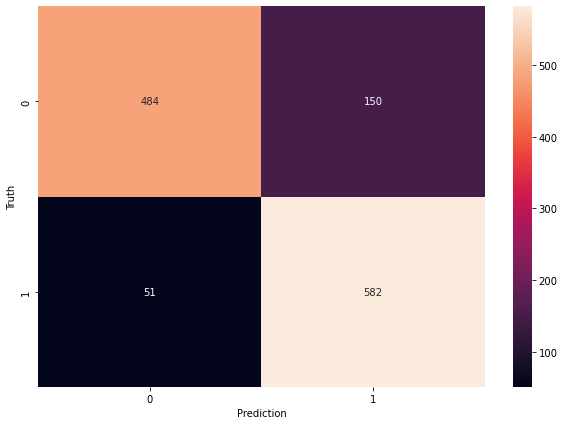

In [29]:
from  sklearn.neighbors import KNeighborsClassifier

#. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       634
           1       0.80      0.92      0.85       633

    accuracy                           0.84      1267
   macro avg       0.85      0.84      0.84      1267
weighted avg       0.85      0.84      0.84      1267



Text(69.0, 0.5, 'Truth')

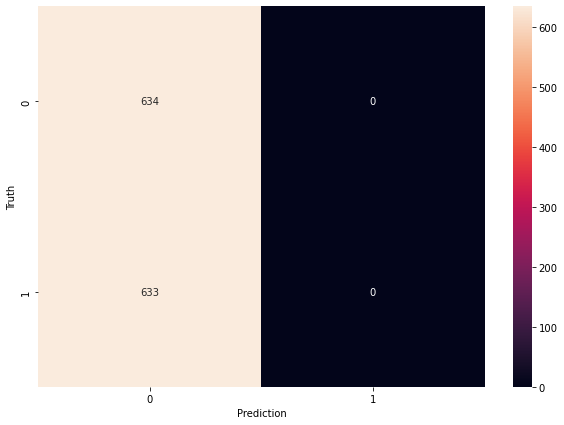

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')